--------------------------

---------------------------

# Mission_2

# Statistiques descriptives et analyses univariées

### Variable quantitative:

Les prix produits

### Variables qualitatives:

Les id (client_id, id_prod, session_id)

Les dates de transactions (de 2021-03-01 à 2022-02-28)

Le sexe des clients (f ou m)

Les catégories produits (0, 1 ou 2)

### Pour mieux comprendre les ventes, l'analyse portera notamment les dimensions suivantes :

Les prix des produits

L'évolution des Chiffre d'Affaires (de ventes)

La répartition sectorielle (par Catégorie)

La répartition démographique par âge et sexe client

Le comportement client (fidélisation)

Corrélation, lien(s) possible(s) entre les variables

In [1]:
#Import des librairies Python
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import scipy.stats as st

import statsmodels.api as sm
import math as mth

In [2]:
#Paramètres graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['font.size'] = 16

In [3]:
transaction_produit_client= pd.read_csv('transactions_products_client.csv')
transaction_produit_client

,date,client_id,sex,birth,id_prod,price,categ,session_id
0,2021-03-01 00:01:07.843138,c_329,f,1967,0_1259,11.99,0,s_1
1,2021-09-30 13:32:32.789640,c_2298,m,1972,0_674,13.95,0,s_97930
2,2021-09-30 13:33:14.103844,c_7714,f,1972,0_2029,3.99,0,s_97943
3,2021-09-30 13:36:06.900756,c_441,f,1972,0_2291,12.99,0,s_97931
4,2021-09-30 13:36:08.951808,c_7714,f,1972,0_699,18.99,0,s_97943
...,...,...,...,...,...,...,...,...
336708,2022-02-06 09:16:52.981557,c_7533,f,2004,2_184,49.61,2,s_160769
336709,2021-08-30 15:55:35.071302,c_4381,m,2004,2_102,59.14,2,s_82743
336710,2021-05-04 14:14:05.187463,c_5382,f,1995,2_164,52.26,2,s_29823
336711,2021-11-13 04:13:13.607660,c_6528,m,2004,2_115,50.99,2,s_118859


In [4]:
# Etude statistique de la dataframe
transaction_produit_client.describe()

,birth,price,categ
count,336713.000000,336713.000000,336713.000000
mean,1977.823568,17.215189,0.430156
std,13.524433,17.855445,0.591082
min,1929.000000,0.620000,0.000000
25%,1971.000000,8.610000,0.000000
50%,1980.000000,13.900000,0.000000
75%,1987.000000,18.990000,1.000000
max,2004.000000,300.000000,2.000000


----------------------

# Analyse de l'évolution du chiffre d'affaires

In [5]:
# ajout une colonne moi_année et modifiez le format de la date pour avoir que le mois et l'année
transaction_produit_client['mois-année'] = pd.to_datetime(transaction_produit_client['date'])
transaction_produit_client['date'] = pd.to_datetime(transaction_produit_client['date'])
transaction_produit_client['mois-année'] = transaction_produit_client['date'].apply(lambda x: x.strftime("%b %Y"))
transaction_produit_client.head()

,date,client_id,sex,birth,id_prod,price,categ,session_id,mois-année
0,2021-03-01 00:01:07.843138,c_329,f,1967,0_1259,11.99,0,s_1,Mar 2021
1,2021-09-30 13:32:32.789640,c_2298,m,1972,0_674,13.95,0,s_97930,Sep 2021
2,2021-09-30 13:33:14.103844,c_7714,f,1972,0_2029,3.99,0,s_97943,Sep 2021
3,2021-09-30 13:36:06.900756,c_441,f,1972,0_2291,12.99,0,s_97931,Sep 2021
4,2021-09-30 13:36:08.951808,c_7714,f,1972,0_699,18.99,0,s_97943,Sep 2021


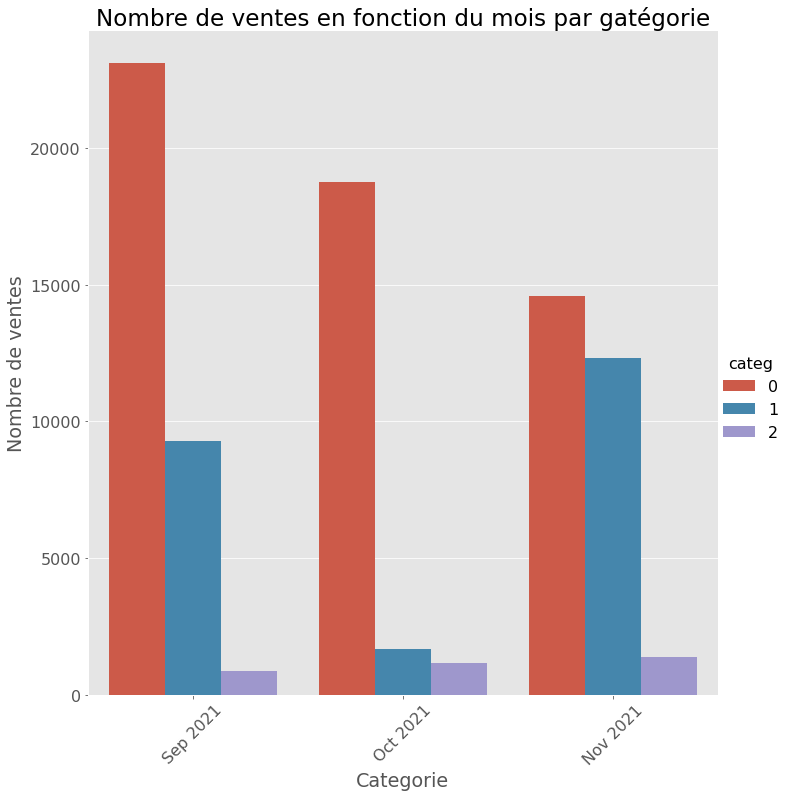

In [6]:
# répresentation graphique de nombre de ventes en fonction du mois
transaction_sept_oct_nov = transaction_produit_client[(transaction_produit_client['mois-année'] == 'Sep 2021') |(transaction_produit_client['mois-année'] == 'Oct 2021') | (transaction_produit_client['mois-année'] == 'Nov 2021')]
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#avec la fonction catplot on va essayé d'observé le nombre de vente en fonction du mois par gatégorie
#le paramètre 'hue' on peut voir les différents types des catégories selon le nombre de ventes pendant les 3 mois quand a choisi

sns.catplot('mois-année', data=transaction_sept_oct_nov, hue='categ', kind='count', height=10)
plt.xticks(rotation=45)
plt.xlabel('Categorie')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes en fonction du mois par gatégorie')
plt.savefig("Nombre de ventes en fonction du mois par gatégorie.png",dpi=100)
plt.show()

In [7]:
pd.set_option('mode.chained_assignment', None)
transaction_oct = transaction_produit_client[transaction_produit_client['mois-année'] == 'Oct 2021']
transaction_oct['date'] = transaction_oct['date'].apply(lambda x: x.strftime("%a %d %b %Y"))
transaction_oct['date'] = pd.to_datetime(transaction_oct['date'])
transaction_oct = transaction_oct.sort_values('date')
transaction_oct['date'] = transaction_oct['date'].apply(lambda x: x.strftime("%a %d %b %Y"))
print(transaction_oct)

                   date client_id sex  birth id_prod  price  categ session_id  \
1005    Fri 01 Oct 2021    c_4266   m   1969  0_2080  12.76      0    s_98606   
1960    Fri 01 Oct 2021    c_2977   m   2002  0_2119   9.99      0    s_98351   
1959    Fri 01 Oct 2021    c_5711   f   1966  0_1626  14.02      0    s_98358   
1958    Fri 01 Oct 2021    c_7721   m   1978  0_1453   7.99      0    s_98346   
1957    Fri 01 Oct 2021    c_7721   m   1978  0_1067  12.99      0    s_98346   
...                 ...       ...  ..    ...     ...    ...    ...        ...   
23248   Sun 31 Oct 2021    c_2632   f   1976   0_830  11.89      0   s_112744   
23249   Sun 31 Oct 2021    c_2103   f   1973  0_1450   7.43      0   s_112720   
23250   Sun 31 Oct 2021    c_2103   f   1973  0_1585   4.99      0   s_112720   
23282   Sun 31 Oct 2021    c_2795   f   1978  0_1095   6.99      0   s_112809   
326658  Sun 31 Oct 2021    c_8429   m   2003   2_174  83.63      2   s_112801   

       mois-année  
1005   

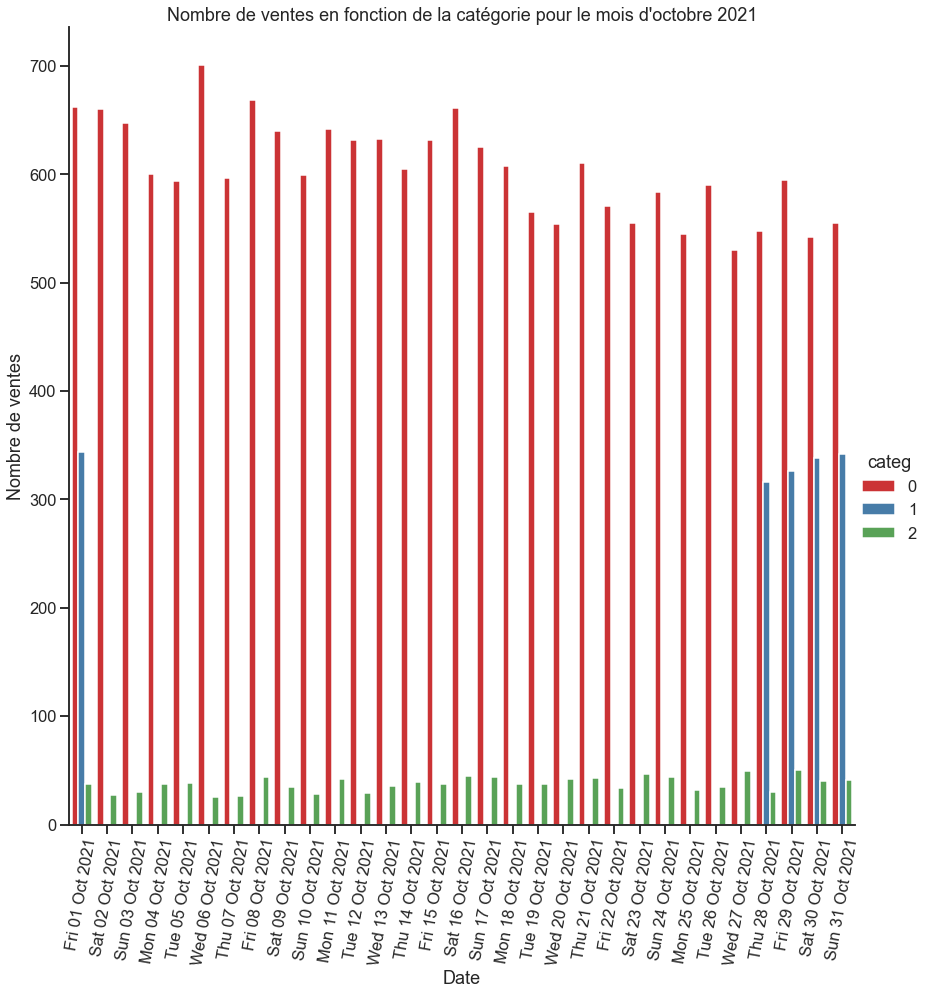

In [8]:
# répresentation graphique de nombre de ventes en fonction de la catégorie pour le mois d'octobre 2021
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas

sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set1')

sns.catplot('date', data=transaction_oct, hue='categ', kind='count', height=12)
plt.xticks(rotation=80)
plt.xlabel('Date')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes en fonction de la catégorie pour le mois d\'octobre 2021')
plt.savefig("Nombre de ventes octobre.png",dpi=120)
plt.show()

On ajoute une colonne 'age' à notre fichier pour pouvoir voir la répartition des âges dans notre fichier.

In [9]:
transaction_produit_client['age'] = 2022 -transaction_produit_client['birth']
print(transaction_produit_client.head())

                        date client_id sex  birth id_prod  price  categ  \
0 2021-03-01 00:01:07.843138     c_329   f   1967  0_1259  11.99      0   
1 2021-09-30 13:32:32.789640    c_2298   m   1972   0_674  13.95      0   
2 2021-09-30 13:33:14.103844    c_7714   f   1972  0_2029   3.99      0   
3 2021-09-30 13:36:06.900756     c_441   f   1972  0_2291  12.99      0   
4 2021-09-30 13:36:08.951808    c_7714   f   1972   0_699  18.99      0   

  session_id mois-année  age  
0        s_1   Mar 2021   55  
1    s_97930   Sep 2021   50  
2    s_97943   Sep 2021   50  
3    s_97931   Sep 2021   50  
4    s_97943   Sep 2021   50  


In [10]:
#Définition de classe d'âge
cut_bins = [17, 31, 51, 94]
cut_labels = ['18-30', '31-50', '51+']
transaction_produit_client['classe_age'] = pd.cut(transaction_produit_client['age'], bins=cut_bins, labels=cut_labels)

On s'intéresse à la répartition des femmes et des hommes dans notre fichier client.

<Figure size 1008x504 with 0 Axes>

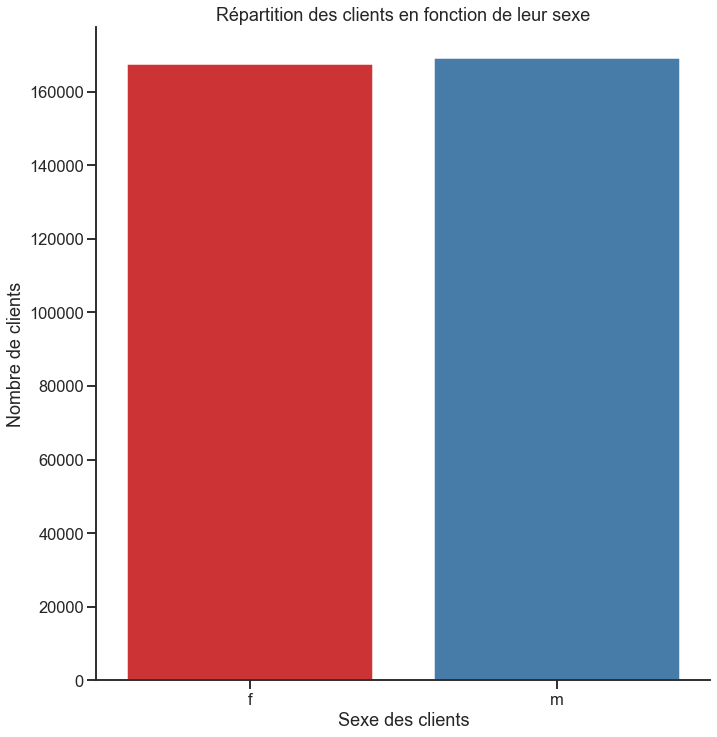

In [11]:
## Graphique Répartition clients selon sexe
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


plt.figure()


sns.catplot('sex', data=transaction_produit_client, kind='count', height=10)
plt.xlabel('Sexe des clients')
plt.ylabel('Nombre de clients')
plt.title('Répartition des clients en fonction de leur sexe')

plt.savefig("Répartition des clients en fonction de leur sexe.png",dpi=120)
plt.show()

Le nombre d'hommes et de femmes est équivalent. On crée deux dataFrames contenant les informations des clients féminins et masculins pour faire d'autres analyses.

In [12]:
transaction_produit_client_f = transaction_produit_client[transaction_produit_client['sex']=='F']
transaction_produit_client_m = transaction_produit_client[transaction_produit_client['sex']=='M']

In [13]:
#Fréquence achats par utilisateur 
freq=transaction_produit_client[["client_id","session_id"]]
freq['client_id'].value_counts().describe()

count     8600.000000
mean        39.152674
std        156.434080
min          1.000000
25%         14.000000
50%         25.000000
75%         47.000000
max      12855.000000
Name: client_id, dtype: float64

39 achats par an en moyenne

50% 14-47 achats

max = 12855 

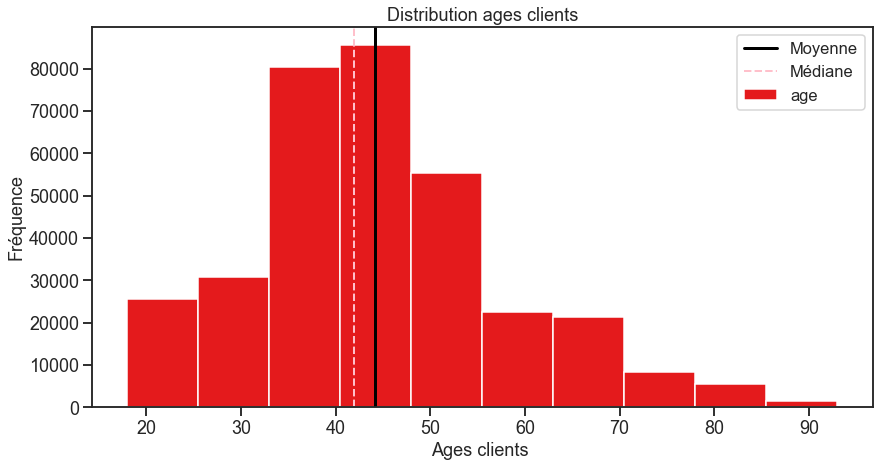

In [14]:
plt.figure()
transaction_produit_client['age'].plot(kind='hist')

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axvline(x=transaction_produit_client['age'].mean(), label='Moyenne', linestyle='-', linewidth=3, color='black')
plt.axvline(x=transaction_produit_client['age'].median(), label='Médiane', linestyle='--', linewidth=2, color='pink')
plt.title("Distribution ages clients")
plt.ylabel("Fréquence")
plt.xlabel("Ages clients ")
plt.legend()

plt.savefig("Distribution ages clients.png",dpi=120)
plt.show()

In [15]:
print(transaction_produit_client.describe())

               birth          price          categ            age
count  336713.000000  336713.000000  336713.000000  336713.000000
mean     1977.823568      17.215189       0.430156      44.176432
std        13.524433      17.855445       0.591082      13.524433
min      1929.000000       0.620000       0.000000      18.000000
25%      1971.000000       8.610000       0.000000      35.000000
50%      1980.000000      13.900000       0.000000      42.000000
75%      1987.000000      18.990000       1.000000      51.000000
max      2004.000000     300.000000       2.000000      93.000000


## Conclusion des différentes analyses

L'âge moyen est de 44 ans. La médiane de ces échantillons est proche de la moyenne " 43 ans". Les différentes distributions montrent un mode dans la classe est 18. Ce mode peut s'expliquer par une des limitations du site qui demande un âge minimum de 18 ans pour pouvoir s'inscrire. Il est possible que des personnes n'ayant pas l'âge minimum s'inscrive en se plaçant dans cette catégorie.



---------------------------

## la distribution des prix des produits indépendamment de leur catégorie.

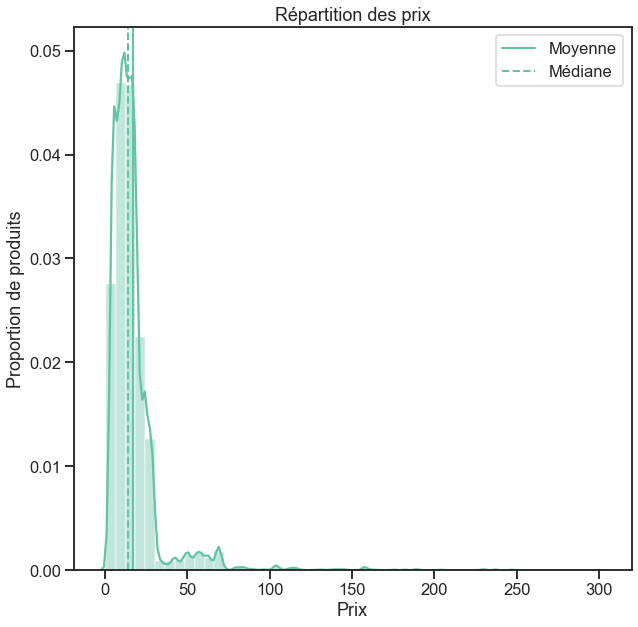

In [16]:
# Graphique distribution prix
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')

plt.figure(figsize = (10,10))
sns.distplot(transaction_produit_client['price'])
plt.axvline(x=transaction_produit_client['price'].mean(), label='Moyenne', linestyle='-', linewidth=2)
plt.axvline(x=transaction_produit_client['price'].median(), label='Médiane', linestyle='--', linewidth=2)
plt.xlabel('Prix')
plt.ylabel('Proportion de produits')
plt.title('Répartition des prix')
plt.legend()

plt.savefig("Répartition des prix.png",dpi=120)
plt.show()

In [17]:
transaction_produit_client_skew = st.skew(transaction_produit_client['price'])
print('Skewness des prix : ', transaction_produit_client_skew)

Skewness des prix :  5.479171970419527


In [18]:
## Tendances centrales Prix
transaction_produit_client["price"].describe()

count    336713.000000
mean         17.215189
std          17.855445
min           0.620000
25%           8.610000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

La distribution des valeurs des prix est asymétrique. Le prix moyen des produits est de 17.10€ (std: 17.05€) et la médiane est de 13.83€. La médiane est plus précise que la moyenne dans ce cas car elle n'est pas sensible aux outliers (article à 300€). L'asymétrie vers la gauche des prix montre que la plupart des produits sont petits.

## Par la suite on s'intéresse à la répartition des prix en fonction de leurs catégories.

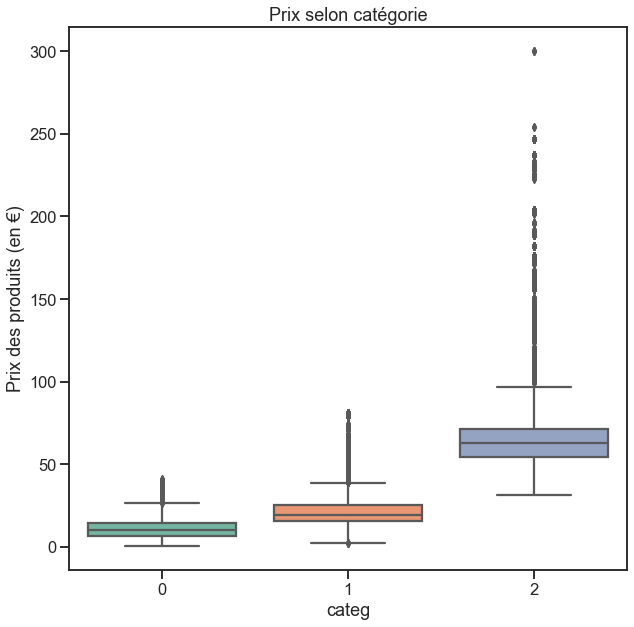

In [19]:
# Graphique selon catégorie
plt.figure(figsize=(10,10))
sns.boxplot( x=transaction_produit_client["categ"], y=transaction_produit_client["price"] )

plt.title("Prix selon catégorie")
plt.ylabel("Prix des produits (en €)")
plt.savefig("Prix selon catégorie.png",dpi=120)
plt.show()


## Analyse des transactions

### Calculs et représentations graphiques

In [20]:
transaction_produit_client = transaction_produit_client.sort_values('date')
transaction_produit_client = transaction_produit_client.set_index('date')
print(transaction_produit_client.head())

                           client_id sex  birth id_prod  price  categ  \
date                                                                    
2021-03-01 00:01:07.843138     c_329   f   1967  0_1259  11.99      0   
2021-03-01 00:02:26.047414     c_664   m   1960  0_1390  19.37      0   
2021-03-01 00:02:38.311413     c_580   m   1988  0_1352   4.50      0   
2021-03-01 00:04:54.559692    c_7912   f   1989  0_1458   6.55      0   
2021-03-01 00:05:18.801198    c_2033   f   1956  0_1358  16.49      0   

                           session_id mois-année  age classe_age  
date                                                              
2021-03-01 00:01:07.843138        s_1   Mar 2021   55        51+  
2021-03-01 00:02:26.047414        s_2   Mar 2021   62        51+  
2021-03-01 00:02:38.311413        s_3   Mar 2021   34      31-50  
2021-03-01 00:04:54.559692        s_4   Mar 2021   33      31-50  
2021-03-01 00:05:18.801198        s_5   Mar 2021   66        51+  


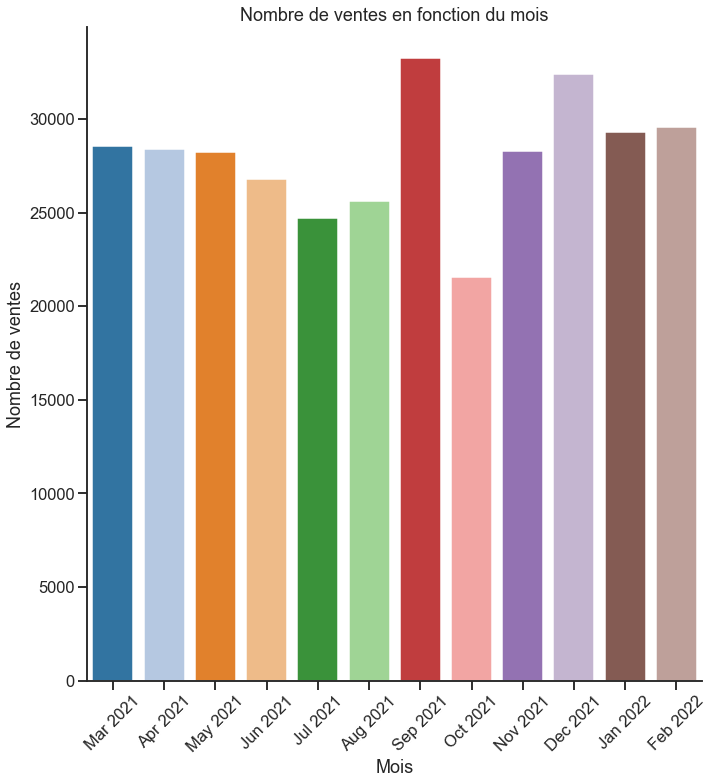

In [21]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('tab20')

sns.catplot('mois-année', data=transaction_produit_client, kind='count', height=10)
plt.xticks(rotation=45)
plt.xlabel('Mois')
plt.ylabel('Nombre de ventes')
plt.title('Nombre de ventes en fonction du mois')
plt.savefig("Nombre de ventes en fonction du mois.png",dpi=120)
plt.show()

On observe une forte baisse des ventes pour le mois d'octobre.

In [22]:
#Total du chiffre d'affaire
df = transaction_produit_client
transaction_CA = df.groupby('mois-année').sum().reset_index()
transaction_CA['mois-année'] = pd.to_datetime(transaction_CA['mois-année'])
transaction_CA = transaction_CA.sort_values('mois-année')
transaction_CA['cumprice'] = transaction_CA['price'].cumsum()
transaction_CA = transaction_CA[['mois-année', 'price', 'cumprice']]

print(transaction_CA)
print('Total du chiffre d\'affaire :', round(transaction_CA['price'].sum(), 2))

   mois-année      price      cumprice
7  2021-03-01  479312.03  4.793120e+05
0  2021-04-01  472980.72  9.522927e+05
8  2021-05-01  489367.95  1.441661e+06
6  2021-06-01  481257.94  1.922919e+06
5  2021-07-01  480898.66  2.403817e+06
1  2021-08-01  479305.19  2.883122e+06
11 2021-09-01  502771.28  3.385894e+06
10 2021-10-01  319159.96  3.705054e+06
9  2021-11-01  512890.17  4.217944e+06
2  2021-12-01  522937.68  4.740882e+06
4  2022-01-01  522955.31  5.263837e+06
3  2022-02-01  532740.88  5.796578e+06
Total du chiffre d'affaire : 5796577.77


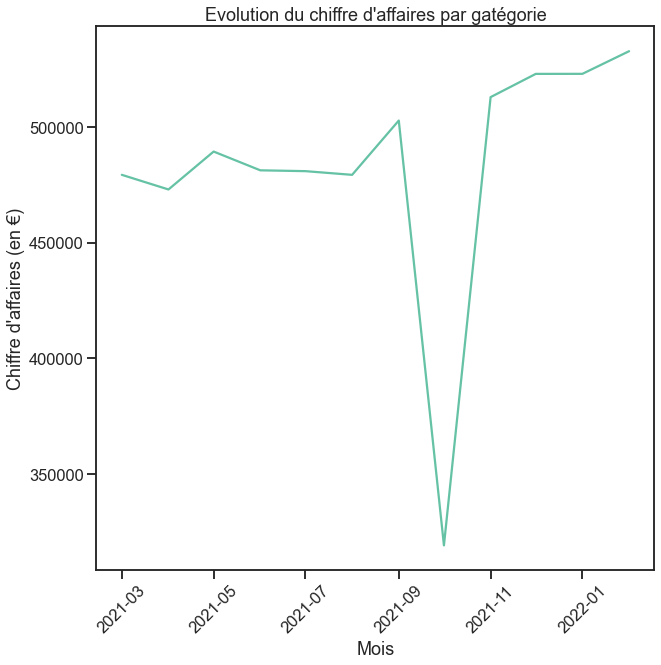

In [23]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (10,10))

plt.plot(transaction_CA['mois-année'], transaction_CA['price'])
plt.xticks(rotation=45)
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires (en €)')
plt.title('Evolution du chiffre d\'affaires par gatégorie')
plt.savefig("Evolution du chiffre d'affaires par gatégorie.png",dpi=120)
plt.show()

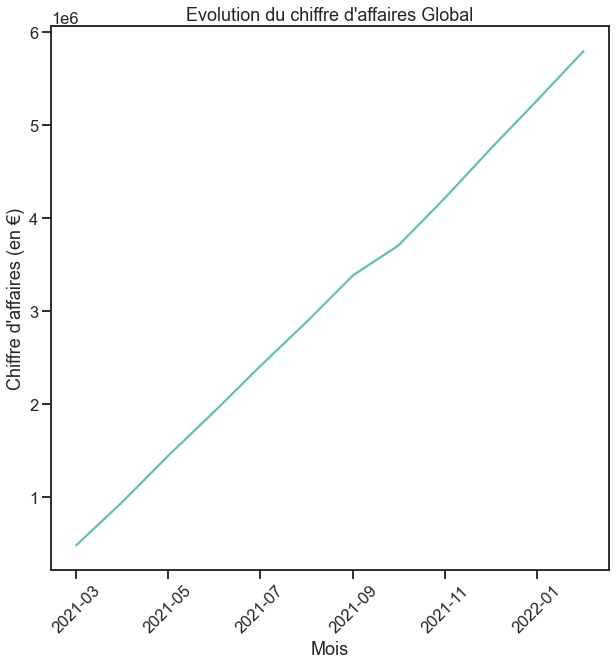

In [24]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize = (10,10))

plt.plot(transaction_CA['mois-année'], transaction_CA['cumprice'])
plt.xticks(rotation=45)
plt.xlabel('Mois')
plt.ylabel('Chiffre d\'affaires (en €)')
plt.title('Evolution du chiffre d\'affaires Global')
plt.savefig("Evolution du chiffre d'affaires Global.png",dpi=120)
plt.show()

Le chiffres d'affaires chutent brutalement au mois d'octobre. Ces données vont dans le même sens que celle du nombre de ventes. Cette diminution est expliquée dans le script de nettoyage.

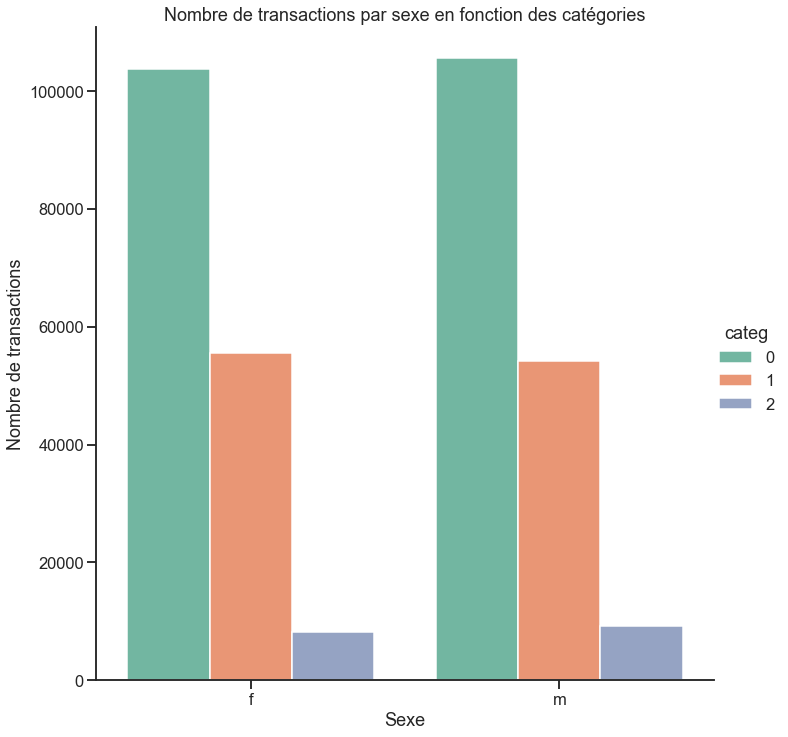

In [25]:
sns.set_style('ticks')
sns.set_context('talk')
sns.set_palette('Set2')

sns.catplot('sex', hue='categ', data=df, kind='count', height=10)
plt.xlabel('Sexe')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions par sexe en fonction des catégories')

plt.savefig("Nombre de transactions par sexe en fonction des catégories.png",dpi=120)
plt.show()

On observe que le sexe n'a pas d'influence sur les catégories d'achat. Les clients achetent énormément de produits de la catégorie 0 et moins de la catégorie 2.

###  Conclusion
Le nombre de ventes est globalement le même tous les mois. On observe une diminution du nombre de transaction en octobre. Cette diminution s'observe aussi sur le chiffre d'affaires. Mis à part l'incident du mois d'octobre, le chiffre d'affaire est en augmentation constante sur l'année.

## Analyse de concentration

In [26]:
client = df
client['count'] = 1
client = df.groupby('client_id').sum().reset_index()
client = client.sort_values('count', ascending=False)
client = client[['client_id', 'count']]

client = client.sort_values('count', ascending=False)
top_10 = client.iloc[0:10]
print(top_10)

     client_id  count
677     c_1609  12855
6337    c_6714   4471
2724    c_3454   3273
4388    c_4958   2562
7715    c_7959    195
1268    c_2140    195
1772    c_2595    193
7791    c_8026    192
3024    c_3725    190
7120    c_7421    189


In [27]:
produit = df
produit['count'] = 1
produit = produit.groupby('id_prod').sum().reset_index()
produit = produit.sort_values('count', ascending=False)
df_produit = produit[['id_prod', 'count']]


top_10_prod = produit.iloc[0:10]
print(top_10_prod)


     id_prod    birth     price  categ    age  count
2590   1_369  2133707  25933.19   1081  52075   1081
2643   1_417  2097288  22291.38   1062  50076   1062
2732   1_498  2045782  24211.32   1036  49010   1036
2640   1_414  2026596  24473.41   1027  49998   1027
2652   1_425  1999882  17210.87   1013  48404   1013
2621   1_398  1879567   9681.84    952  45377    952
2631   1_406  1868172  23470.26    946  44640    946
2639   1_413  1863214  16982.56    944  45554    944
2628   1_403  1853798  16892.61    939  44860    939
2632   1_407  1842385  14918.67    933  44141    933


In [28]:
# achats cumulés en fonction de l'âge des clienrts
df_age = df.groupby('age').sum().reset_index()
df_age['cum_achat'] = df_age['count'].cumsum()

In [29]:
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

X = np.array(df_age['cum_achat'])
print('Indice de Gini : ', gini(X))

Indice de Gini :  0.2961221436452539


Indice de Gini semblant tendre vers une égalité de la répartition des achats par la suite

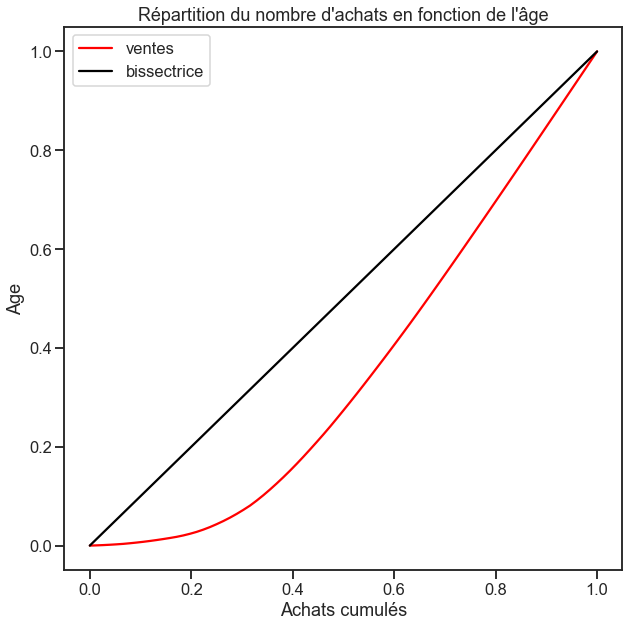

In [30]:
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

fig, ax = plt.subplots(figsize=[10,10])
ax.plot(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, color='red', label='ventes')
ax.plot([0,1], [0,1], color='k', label='bissectrice')

plt.xlabel('Achats cumulés')
plt.ylabel('Age')
plt.title('Répartition du nombre d\'achats en fonction de l\'âge')
plt.legend()


plt.show()

Âge : 0% = 18 ; 25% = 30 ; 50% = 43 ; 75% = 56 ; 100% = 93

50% des achats cumulés se font par le premier quartile des âges des clients(30ans)

----------------------

# Mission 3 : Analyses bivariées

## les correlations

Plusieurs analyses bivariées ont été réalisés pour mieux comprendre le comportement de nos clients.

Les corrélations indiquent si deux variables sont linéairement équivalentes.
Voici quelques questions supplémentaires pour nous aider à mieux comprendre les ventes enregistrées.

Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?

Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (nombre d'achats par mois) ?

Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles) ?

Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés ?

En théorie:

La corrélation est une mesure statistique qui exprime la notion de liaison linéaire entre deux variables (ce qui veut dire qu'elles évoluent ensemble à une vitesse constante). C'est un outil courant permettant de décrire des relations simples sans s'occuper de la cause et de l'effet.

## 3_1.Corrélation entre le sexe des clients et la catégorie des achats

In [31]:
# Création du tableau de contingence "Matrice des valeurs observées"
# Variables 'sex' et 'categ' du dataframe df
X = 'sex'
Y = 'categ'

# Calcul du tableau de contigence par la méthode .pivot_table()
c = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len) ###, margins=True, margins_name='Total'
tx = df[X].value_counts()
ty = df[Y].value_counts()

# Création d'une copie du dataframe original
cont = c.copy()
cont

categ,0,1,2
sex,,,
f,103786,55469,8260
m,105640,54266,9292


In [32]:
# Création de la "Matrice des valeurs attendues"
# L’occurrence attendue est simplement la fréquence que l’on devrait trouver dans une cellule 
# si l’hypothèse nulle était vraie.
tx_df= pd.DataFrame(tx)
ty_df = pd.DataFrame(ty)

tx_df.columns = ["s"]
ty_df.columns = ["s"]

# Valeurs totales observées
n = len(df)

# Produit matriciel. On utilise pd.T pour pivoter une des deux séries.
indep = (tx_df.dot(ty_df.T) / n)
indep

,0,1,2
m,105236.389293,55141.745433,8819.865274
f,104189.610707,54593.254567,8732.134726


In [33]:
# Matrice "écart au carré normalisé de la valeur attendue VS valeur observée"
mesure = (c-indep)**2/indep
mesure

categ,0,1,2
f,1.563511,14.048074,25.527687
m,1.547959,13.908339,25.273765


In [34]:
# Calcul du Chi2
# Tester l’hypothèse nulle consiste à comparer les occurrences observées (celles déjà dans le tableau) 
# avec les occurrences attendues.
chi2 = mesure.sum().sum()
chi2

81.86933350990711

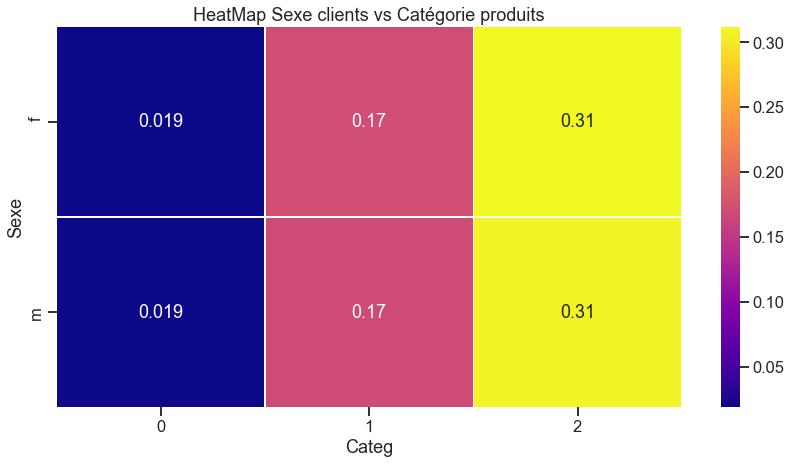

In [35]:
# HeatMap 
table = (mesure/chi2)
sns.heatmap(table, annot=True, cmap="plasma", linewidths=0.1)

plt.title('HeatMap Sexe clients vs Catégorie produits')
plt.xlabel('Categ')
plt.ylabel('Sexe')
plt.savefig("Heatmap sexe clients vs catégorie produits.png",dpi=120)

plt.show()

Le test de Chi2 est utilisé pour tester l'hypothèse nulle (H0) d'absence de relation entre deux variables catégorielles, ce test vérifie donc l'hypothèse d'indépendance de ces variables.

La valeur de Chi2 est une quantification de cet écart (entre les occurences attendues et celles observées). Plus la valeur sera élevée, plus l'écart entre l'hypothèse nulle et la situation réelle sera grand.

Plus l’occurrence observée est près de l’occurrence attendue, plus la fraction calculée pour chaque cellule est petite et moins l’écart avec H0 est grand.

In [36]:
# Calcul du khi2 et de la p-value à partir de la matrice des valeurs observées avec scipy 
# Degré de liberté = (nombre de lignes – 1) X (nombre de colonnes – 1)
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue

(81.86933350990711, 2, 1.6683997257127539e-18)

---------------

## 3_2.Corrélation entre l'âge des clients et le montant total des achats

In [37]:
#Agrégation pour sommer les ventes 'price' (produits achetés) en fonction de l'âge des clients
#Création d'une variable 'age_price'
age_price = df.groupby('age').sum().reset_index()
age_price = age_price[['age', 'price']].sort_values(by='age', ascending=False) 
age_price['price'] = age_price['price'] / 1000 #Valeurs exprimées en K€

age_price.head() #Apperçu des données âges / ventes

,age,price
75,93,1.30003
74,92,2.02835
73,91,1.43292
72,90,2.58609
71,89,2.63202


In [38]:
age_price.tail()

,age,price
4,22,80.09992
3,21,84.88148
2,20,89.91002
1,19,88.46139
0,18,295.38798


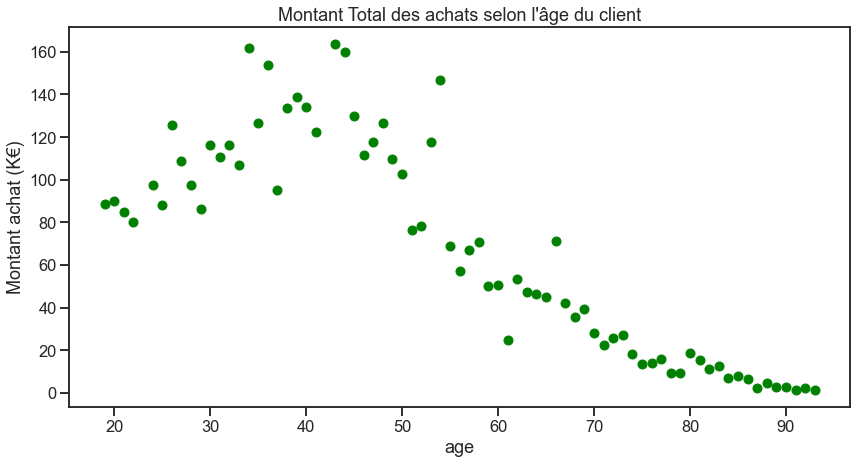

In [39]:
#Visualisation avec un scatterplot (âge clients vs montant total des achats)
plt.plot(age_price[age_price.price < 200].age, age_price[age_price.price < 200].price, 'o', color='green')

plt.xlabel('age')
plt.ylabel('Montant achat (K€)')
plt.title('Montant Total des achats selon l\'âge du client')

plt.savefig("Montant total des achats selon l'âge du client.png",dpi=120)

plt.show()

In [40]:
#Coefficient de corrélation linéaire de Pearson
coef_age_price = st.pearsonr(age_price.age, age_price.price)[0]
coef_age_price

-0.774658083768212

Le coefficient est négatif par conséquent, on peut émettre l'hypothèse que plus les consommateurs sont agés plus le montant total de leur achat est faible. Or le coefficient est plus proche de -1 que de zéro. Par conséquent, on peut affirmer que plus les consommateurs sont agés plus le montant total de leur achat est faible.(forte correlation)

--------------------------

## 3_3.Corrélation entre l'âge des clients et la fréquence d’achat

In [41]:
# Analyse faite à partir du dataframe global df
df.head()

,client_id,sex,birth,id_prod,price,categ,session_id,mois-année,age,classe_age,count
date,,,,,,,,,,,
2021-03-01 00:01:07.843138,c_329,f,1967,0_1259,11.99,0,s_1,Mar 2021,55,51+,1
2021-03-01 00:02:26.047414,c_664,m,1960,0_1390,19.37,0,s_2,Mar 2021,62,51+,1
2021-03-01 00:02:38.311413,c_580,m,1988,0_1352,4.50,0,s_3,Mar 2021,34,31-50,1
2021-03-01 00:04:54.559692,c_7912,f,1989,0_1458,6.55,0,s_4,Mar 2021,33,31-50,1
2021-03-01 00:05:18.801198,c_2033,f,1956,0_1358,16.49,0,s_5,Mar 2021,66,51+,1


In [42]:
# Agrégation des données selon l'âge client
# Le nombre d'achat mensuel est obtenu à partir du comptage des sessions clients par mois
# Hypothèse 1 id_session = 1 transation
customers_freq = df.groupby('age').count().reset_index()
customers_freq = customers_freq[['age', 'session_id']]

# Création d'une variable fréquence 'f'
customers_freq['f'] = customers_freq['session_id'] / sum(customers_freq['session_id'])
customers_freq.sort_values(by='age', ascending=False).head(10)

,age,session_id,f
75,93,86,0.000255
74,92,115,0.000342
73,91,84,0.000249
72,90,159,0.000472
71,89,163,0.000484
70,88,274,0.000814
69,87,143,0.000425
68,86,387,0.001149
67,85,454,0.001348
66,84,431,0.001280


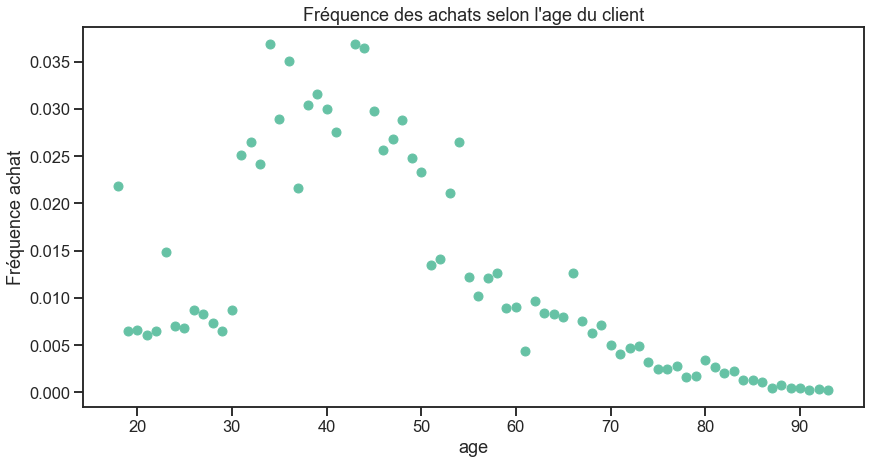

In [43]:
# Visualisation avec un scatterplot (âge client vs fréquence d'achat mensuelle)
# customers_freq.plot.scatter(x = 'age', y = 'f', marker = 'o', color='purple')
plt.plot(customers_freq[customers_freq.f < .05].age, customers_freq[customers_freq.f < .05].f, 'o')

plt.xlabel('age')
plt.ylabel('Fréquence achat')
plt.title('Fréquence des achats selon l\'age du client')
plt.savefig("Fréquence des achats selob l'age du client.png",dpi=120)

plt.show()

In [44]:
# Coefficient de corrélation linéaire de Pearson
coef_customers_freq = st.pearsonr(customers_freq.age, customers_freq.f)[0]
coef_customers_freq

-0.5292865989339429

Corrélation confirmée par le coefficient de Pearson, il existe bien un lien entre l'âge des clients et leurs fréquences d'achat. Il semblerait que des groupes de clients se formalisent sur cette corrélation, par exemple entre 18 et 30 ans.

------------------------

## 3.4 Corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles)

Ici la taille du panier moyen sera exprimée en nombre d'articles

In [45]:
# Analyse faite à partir du dataframe global df
df.head()

,client_id,sex,birth,id_prod,price,categ,session_id,mois-année,age,classe_age,count
date,,,,,,,,,,,
2021-03-01 00:01:07.843138,c_329,f,1967,0_1259,11.99,0,s_1,Mar 2021,55,51+,1
2021-03-01 00:02:26.047414,c_664,m,1960,0_1390,19.37,0,s_2,Mar 2021,62,51+,1
2021-03-01 00:02:38.311413,c_580,m,1988,0_1352,4.50,0,s_3,Mar 2021,34,31-50,1
2021-03-01 00:04:54.559692,c_7912,f,1989,0_1458,6.55,0,s_4,Mar 2021,33,31-50,1
2021-03-01 00:05:18.801198,c_2033,f,1956,0_1358,16.49,0,s_5,Mar 2021,66,51+,1


In [46]:
# Première agrégation selon l'age client et les sessions en comptage de modalités
customers_shop = df.groupby(['age', 'session_id']).count().reset_index()

# Seconde agrégation selon l'age client en moyenne de produits achetés 
customers_shop = customers_shop.groupby('age').mean().reset_index()
customers_shop = customers_shop[['age', 'id_prod']]
customers_shop.tail()

,age,id_prod
71,89,1.393162
72,90,1.543689
73,91,1.714286
74,92,1.597222
75,93,1.343750


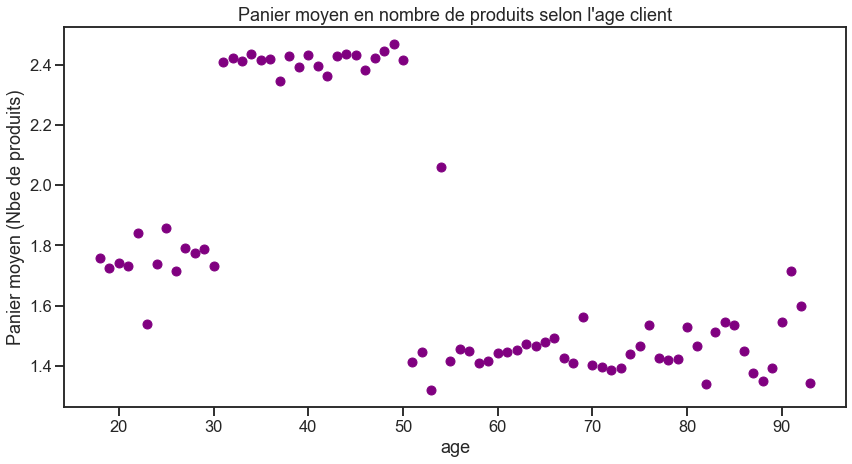

In [47]:
# Visualisation avec un scatterplot (âge client vs taille panier moyen)
plt.plot(customers_shop.age, customers_shop.id_prod, 'o', color='purple')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')
plt.savefig("Panier moyen en nombre de produits selon l'age client.png",dpi=120)

plt.show()

In [48]:
# Subsets pour identifier les clusters clients 
customers_shop31 = customers_shop[customers_shop.age < 31]
customers_shop3050 = customers_shop[(customers_shop.age > 31) & (customers_shop.age < 50)]
customers_shop50 = customers_shop[customers_shop.age > 51]

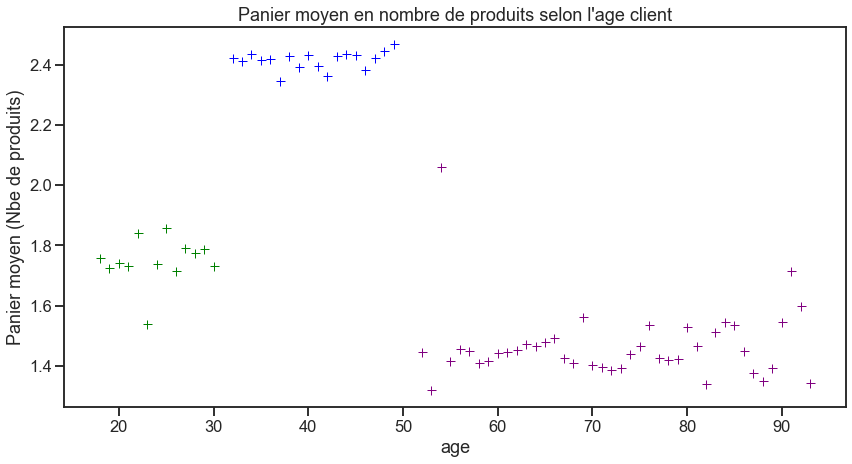

In [49]:
# Visualisation avec scatterplot selon les groupes d'individus identifiés
plt.plot(customers_shop31.age, customers_shop31.id_prod, '+', color='green')
plt.plot(customers_shop3050.age, customers_shop3050.id_prod, '+', color='blue')
plt.plot(customers_shop50.age, customers_shop50.id_prod, '+', color='purple')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')
plt.savefig("Panier moyen en nombre de produits selon l'age client.png",dpi=120)

plt.show()

In [50]:
# Coefficient de corrélation linéaire de Pearson
coef_customers_shop = st.pearsonr(customers_shop.age, customers_shop.id_prod)
coef_customers_shop 

(-0.5807023962048711, 3.820191433423287e-08)

Le test de corrélation démontre un certain lien entre l'âge du client et le panier moyen. Par exemple, sur les individus de plus de 50 ans, le panier moyen reste faible. Il existe également un lien sur les individus de 18 à 30 ans et de 30 à 50 ans. La linéarité de la corrélation existe mais selon des corpus de clients visiblement distincts, par tranches d'âges.

-------------------

## 3.5 Corrélation entre l'âge des clients et les catégories de produits achetés

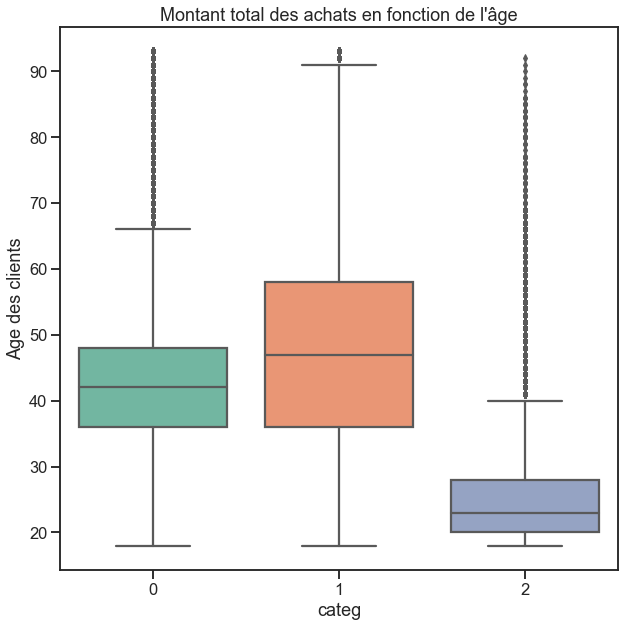

In [51]:
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=[10,10])

sns.boxplot(x='categ', y='age', data=df)
plt.ylabel('Age des clients')
plt.title('Montant total des achats en fonction de l\'âge')
plt.savefig("Montant total des achats en fonction de l'age.png",dpi=120)


plt.show()

In [52]:
X = df['categ'] # qualitative
Y = df['age'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
print('eta-squared :', eta_squared(X,Y))

eta-squared : 0.1188683230368365


Le coefficient eta² montre une forte corrélation entre l'âge des clients et la catégorie d'achat. Les clients les plus jeunes vont essentiellement se tourner vers l'achat de catégorie 2 alors que les autres catégories de produits vont être acheté par tout type de clients.

# Conclusion 

 les femmes comme les hommes achètent en proportion quasi égale sur les 3 gatégories.
 
 Il semblerait que les individus plus agés dépensent moins.
 
 Il ya une consommation plus régulière, une plus grande fidélité par les individus plus jeunes.
 
 Les individus le plus jeunes ont tendance à acheter plus d'articles.

------------------------